<a href="https://colab.research.google.com/github/Punitpawar5/Iris-Flower-Classification-using-SVM/blob/main/python_svm_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris dataset for SVM classification implementation
Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load the Iris dataset

In [15]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Features (Petal length, Petal width)
y = iris.target  # Target (0: Setosa, 1: Versicolor, 2: Virginica)

Split the dataset into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the feature data (scaling)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Initialize and train the Support Vector Machine (SVM) classifier

In [18]:
model = SVC(kernel='linear', random_state=42)  # Linear kernel SVM
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Make predictions on the test data

In [19]:
y_pred = model.predict(X_test)

Evaluate the model

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Generate the classification report

In [21]:
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Generate the confusion matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Plot the confusion matrix

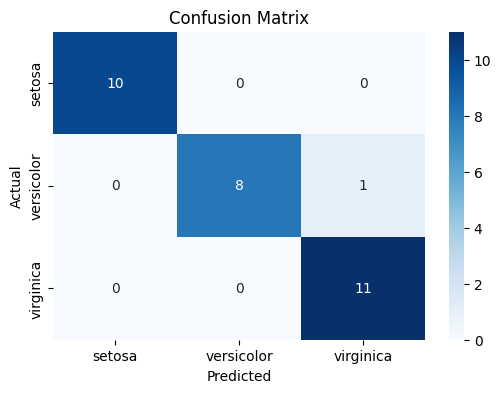

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Plotting the decision boundary for visualization. We plot only two features (Petal length and Petal width) for visualization purposes.

In [23]:
def plot_decision_boundary(X, y, model):
    X = X[:, :2]  # We will use only the first two features for 2D plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary (Petal length vs. Petal width)')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.show()

# Plot the decision boundary (Optional, using two features)

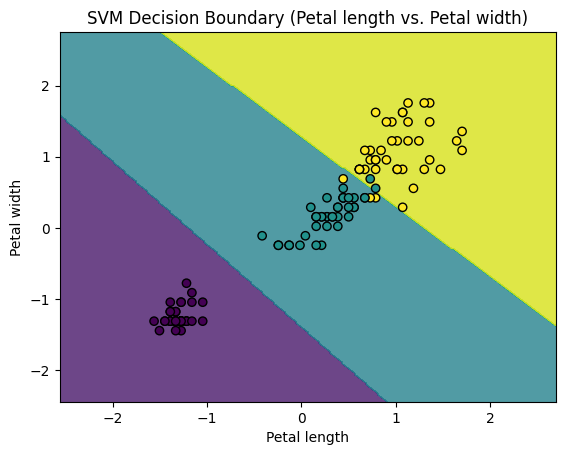

In [24]:
plot_decision_boundary(X_train, y_train, model)